In [26]:
import pandas as pd
import re

# Data Input

In [27]:
df = pd.read_csv("data_panama_only.csv")

In [28]:
df

,Unnamed: 0,add_title,add_price,add_area,add_time,add_room,add_loc,add_prom
0,0,Ocean House en Santa María,287000.00,86.84 m2,9 minutes ago,2,Costa del Este,Grupo Los Pueblos
1,1,"Coco Place en Coco del Mar, San Francisco",227000.00,83.75 m2,12 hours ago,2,Coco del Mar,Grupo Los Pueblos
2,2,Armonía en Cinta Costera,124500.00,45.24 m2,12 hours ago,1,Avenida Balboa,Grupo Los Pueblos
3,3,The Rivage Ave. Balboa Cinta Costera,369000.00,176 m2,13 hours ago,2,Avenida Balboa,Blue Point Realty\nPJ-0393
4,4,espectacular Apartment for sale in Ph Aqualina...,724000.00,315 m2,13 hours ago,3,Punta Pacífica,NaN
...,...,...,...,...,...,...,...,...
12302,12302,"Apartamentos en Santa María, PH Greengarden",NaN,314 m2,NaN,3,Santa María,NaN
12303,12303,Apartamento en Archipiélago Las Perlas,NaN,201 m2,NaN,3,Isla Pedro González,NaN
12304,12304,"Apartamento de 56.42mts en Venta, PH WorldWide...",NaN,56 m2,NaN,2,El Cangrejo,NaN
12305,12305,APARTAMENTO MARBELLA PH LA CONCHA 210 MTS2,NaN,210 m2,NaN,3,Campo Alegre,NaN


# Data Cleaning
## Replace non-alphanumeric values

In [29]:
# replace non-alphanumeric values on titles add
for i in range(len(df["add_title"])):
    df["add_title"][i] = re.sub(r'[^a-zA-Z0-9]', '_', df["add_title"][i])
    
# replace non-alphanumeric values on locations
for i in range(len(df["add_loc"])):
    df["add_loc"][i] = re.sub(r'[^a-zA-Z0-9]', '_', df["add_loc"][i])

c:\users\a-gue\onedrive\documentos\python_projects\panama_apt_pricing\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: expected string or bytes-like object

In [30]:
df.head()

,Unnamed: 0,add_title,add_price,add_area,add_time,add_room,add_loc,add_prom
0,0,Ocean_House_en_Santa_Mar_a,287000.00,86.84 m2,9 minutes ago,2,Costa del Este,Grupo Los Pueblos
1,1,Coco_Place_en_Coco_del_Mar__San_Francisco,227000.00,83.75 m2,12 hours ago,2,Coco del Mar,Grupo Los Pueblos
2,2,Armon_a_en_Cinta_Costera,124500.00,45.24 m2,12 hours ago,1,Avenida Balboa,Grupo Los Pueblos
3,3,The_Rivage_Ave__Balboa_Cinta_Costera,369000.00,176 m2,13 hours ago,2,Avenida Balboa,Blue Point Realty\nPJ-0393
4,4,espectacular_Apartment_for_sale_in_Ph_Aqualina...,724000.00,315 m2,13 hours ago,3,Punta Pacífica,NaN


## Find Missing Values

In [31]:
df.isnull()

,Unnamed: 0,add_title,add_price,add_area,add_time,add_room,add_loc,add_prom
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
12302,False,False,True,False,True,False,False,True
12303,False,False,True,False,True,False,False,True
12304,False,False,True,False,True,False,False,True
12305,False,False,True,False,True,False,False,True


In [32]:
# get developers names
developers = df['add_prom'][~df['add_prom'].isnull()]
developers.unique()

array(['Grupo Los Pueblos', 'Blue Point Realty\nPJ-0393', 'PJ-1251-17',
       'B&B REAL ESTATE PANAMÁ LIC. PJ-1267-18\n1267-18',
       'Rent A House\nPJ-1111-15', 'PANAMA REAL ESTATE\nPJ 0288 06',
       'Panama Real Estate & Investment Consultants, Corp.\nPJ-0288-2006',
       'PREIC\nPJ-0288-2006', 'PHomeRealty, S.A.\nPJ-0966-13',
       'PANAMA VIEW REALTY\nPJ 1281', 'FORD REALTY, S. A.\n0249',
       'TARTEVENDE\nPN0518', 'Joe Collado\nPJ-1376-21',
       'Impulso Pty\nPJ-1310-19', 'Grupo Valor Development',
       'Acquire Panama\nPJ1373-21', '4135',
       'Property Management Solutions\nPJ0387-2007',
       'JP GROUP S.A\nPJ-1151', 'Grupo Tribaldos\nPJ-1251-17', 'Bali',
       'Grupo Bait', 'REYES Inmobiliaria\nPN 4281',
       'PTY PANAMA SERVICES\n4184', 'Grupo Bultrón BR\nPN 5339',
       'PN-3289', 'Promotora Cosmopolitan Corp.\nPROMOTOR',
       'Grupo Empresarial M y C', 'JDF GROUP REALTY\nPJ-1171-16',
       'Nery Carrión\nPN5101', 'Panama Realty Solutions\nPJ-1015',
  

In [33]:
developers.replace('\d+', '', regex=True, inplace=True)
# overwriting column with replaced value of age
developers = developers.str.replace("PJ", "", case = False)
developers.unique()

array(['Grupo Los Pueblos', 'Blue Point Realty\n-', '--',
       'B&B REAL ESTATE PANAMÁ LIC. --\n-', 'Rent A House\n--',
       'PANAMA REAL ESTATE\n  ',
       'Panama Real Estate & Investment Consultants, Corp.\n--',
       'PREIC\n--', 'PHomeRealty, S.A.\n--', 'PANAMA VIEW REALTY\n ',
       'FORD REALTY, S. A.\n', 'TARTEVENDE\nPN', 'Joe Collado\n--',
       'Impulso Pty\n--', 'Grupo Valor Development', 'Acquire Panama\n-',
       '', 'Property Management Solutions\n-', 'JP GROUP S.A\n-',
       'Grupo Tribaldos\n--', 'Bali', 'Grupo Bait',
       'REYES Inmobiliaria\nPN ', 'PTY PANAMA SERVICES\n',
       'Grupo Bultrón BR\nPN ', 'PN-',
       'Promotora Cosmopolitan Corp.\nPROMOTOR',
       'Grupo Empresarial M y C', 'JDF GROUP REALTY\n--',
       'Nery Carrión\nPN', 'Panama Realty Solutions\n-', 'PN',
       'Mr. Propiedades\n-', 'F&F PROPERTIES',
       'Favaro´s Investments --\n--', 'Be Luxe Real Estate\nPN-',
       'Bienes Raíces Metivier\nPN-', 'PN \n',
       'CLOTILDE TAPIA

<AxesSubplot:>

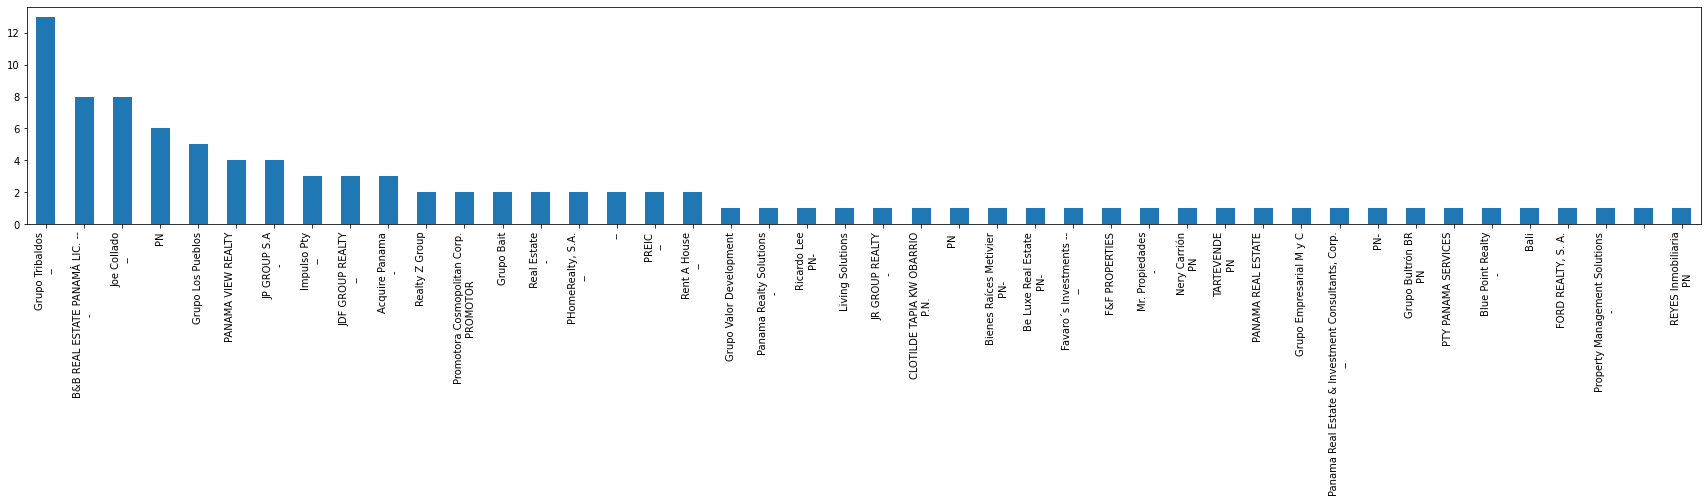

In [34]:
pd.Series(developers).value_counts(sort=True).plot(kind='bar', figsize=(30, 4))

In [35]:
df_clean = df.loc[:, (df.columns!='add_prom') & (df.columns!='add_time') ]

In [36]:
df_clean

,Unnamed: 0,add_title,add_price,add_area,add_room,add_loc
0,0,Ocean_House_en_Santa_Mar_a,287000.00,86.84 m2,2,Costa del Este
1,1,Coco_Place_en_Coco_del_Mar__San_Francisco,227000.00,83.75 m2,2,Coco del Mar
2,2,Armon_a_en_Cinta_Costera,124500.00,45.24 m2,1,Avenida Balboa
3,3,The_Rivage_Ave__Balboa_Cinta_Costera,369000.00,176 m2,2,Avenida Balboa
4,4,espectacular_Apartment_for_sale_in_Ph_Aqualina...,724000.00,315 m2,3,Punta Pacífica
...,...,...,...,...,...,...
12302,12302,"Apartamentos en Santa María, PH Greengarden",NaN,314 m2,3,Santa María
12303,12303,Apartamento en Archipiélago Las Perlas,NaN,201 m2,3,Isla Pedro González
12304,12304,"Apartamento de 56.42mts en Venta, PH WorldWide...",NaN,56 m2,2,El Cangrejo
12305,12305,APARTAMENTO MARBELLA PH LA CONCHA 210 MTS2,NaN,210 m2,3,Campo Alegre


In [37]:
df_clean.dropna()

,Unnamed: 0,add_title,add_price,add_area,add_room,add_loc
0,0,Ocean_House_en_Santa_Mar_a,287000.00,86.84 m2,2,Costa del Este
1,1,Coco_Place_en_Coco_del_Mar__San_Francisco,227000.00,83.75 m2,2,Coco del Mar
2,2,Armon_a_en_Cinta_Costera,124500.00,45.24 m2,1,Avenida Balboa
3,3,The_Rivage_Ave__Balboa_Cinta_Costera,369000.00,176 m2,2,Avenida Balboa
4,4,espectacular_Apartment_for_sale_in_Ph_Aqualina...,724000.00,315 m2,3,Punta Pacífica
...,...,...,...,...,...,...
12284,12284,"Embassy Garden, se vende Loft en Clayton",885480.00\n(Reduced 4%),191 m2,1,Clayton
12285,12285,Torre Imperial. Apartamento a la venta en La C...,850000.00,677 m2,4,La Cresta
12286,12286,"Apartamento a estrenar en El Cangrejo, edifici...",150000.00,209 m2,2,El Cangrejo
12287,12287,Clayton Park II,275000.00\n(Reduced 8%),151 m2,3,Clayton


In [38]:
df_clean.to_csv("data_clean_1_panama.csv")

In [39]:
df_clean.add_loc.unique()

array(['Costa del Este', 'Coco del Mar', 'Avenida Balboa',
       'Punta Pacífica', 'San Francisco', 'Santa María', 'Carrasquilla',
       'Condado del Rey', 'Obarrio', 'El Cangrejo', 'Vista Hermosa',
       'Santa Ana', 'Bella Vista', 'Parque Lefevre', 'La Cresta',
       'Urbanización Don Bosco', 'Clayton', 'Panamá Viejo',
       'Altos de Golf', 'Punta Paitilla', 'Vía Transístmica', 'Marbella',
       'Villa de las Fuentes', 'El Dorado', 'Pueblo Nuevo', 'Edison Park',
       'Miraflores', 'El Carmen', 'Vía Argentina', 'Vía Porras',
       'Hato Pintado', 'Calle 50', '12 de Octubre',
       'Casco Viejo, San Felipe', 'Panama City', 'Amador',
       'Belisario Frías', 'Juan Diaz', 'Vía España', 'Ancón', 'El Crisol',
       'Rio Abajo', 'Vía Brasil', 'Albrook', 'Dos Mares', 'Llano Bonito',
       'Pedregal', 'La Loma', 'Betania', 'El Ingenio', 'Belisario Porras',
       'Tumba Muerto', 'Vía Cincuentenario', 'Villa Cáceres',
       'José Domingo Espinar', 'Brisas del Golf', 'Altos de Pa